<a href="https://colab.research.google.com/github/MarMarhoun/freelance_work/blob/main/side_projects/other_proj/hajar/DDoS_detection__WSN_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> ## Load & Preprocess the dataset

In [ ]:
# import the libraries

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
#from cuml.model_selection import train_test_split
#from cuml.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay


data_path = "/content/WSN-DS.csv"

In [ ]:
data_raw = pd.read_csv(data_path)


df = data_raw.copy()
df.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal


In [ ]:
df

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1.0,0.0,0.0,25.0,1.0,0.0,0.0,0.0,1200.0,48.0,130.08535,0.0,2.46940,Normal
1,101001,50,0,101044,75.32345,0.0,4.0,1.0,0.0,0.0,1.0,2.0,38.0,0.0,0.0,0.00000,4.0,0.06957,Normal
2,101002,50,0,101010,46.95453,0.0,4.0,1.0,0.0,0.0,1.0,19.0,41.0,0.0,0.0,0.00000,3.0,0.06898,Normal
3,101003,50,0,101044,64.85231,0.0,4.0,1.0,0.0,0.0,1.0,16.0,38.0,0.0,0.0,0.00000,4.0,0.06673,Normal
4,101004,50,0,101010,4.83341,0.0,4.0,1.0,0.0,0.0,1.0,25.0,41.0,0.0,0.0,0.00000,3.0,0.06534,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280655,201092,1003,0,201005,65.20922,0.0,1.0,1.0,0.0,0.0,1.0,1.0,14.0,0.0,0.0,0.00000,1.0,0.03042,Normal
280656,201093,1003,0,201005,49.39159,0.0,1.0,1.0,0.0,0.0,1.0,1.0,14.0,0.0,0.0,0.00000,1.0,0.02972,Normal
280657,201094,1003,0,201005,89.19138,0.0,1.0,1.0,0.0,0.0,1.0,1.0,14.0,0.0,0.0,0.00000,1.0,0.03256,Normal
280658,201095,1003,0,201005,41.44484,0.0,1.0,1.0,0.0,0.0,1.0,1.0,14.0,0.0,0.0,0.00000,1.0,0.02946,Normal


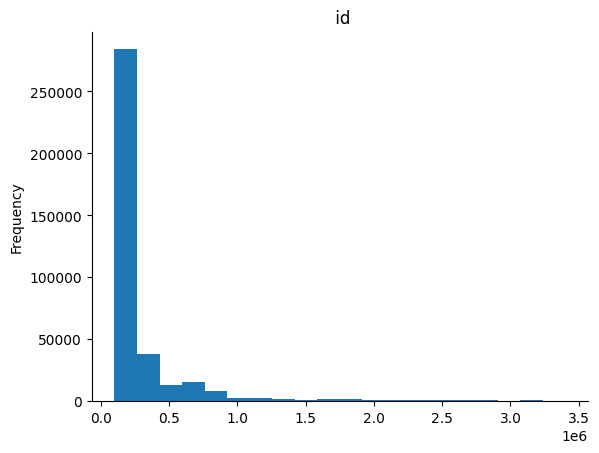

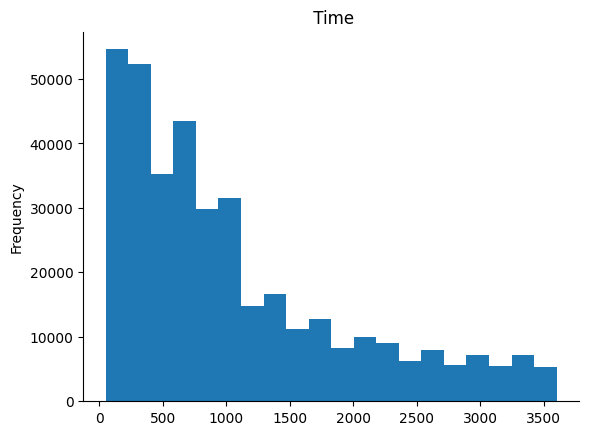

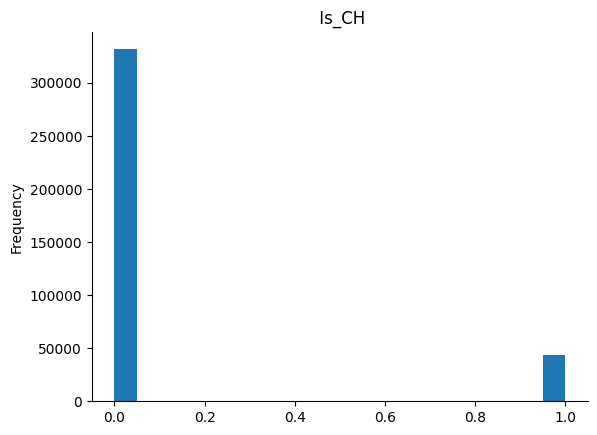

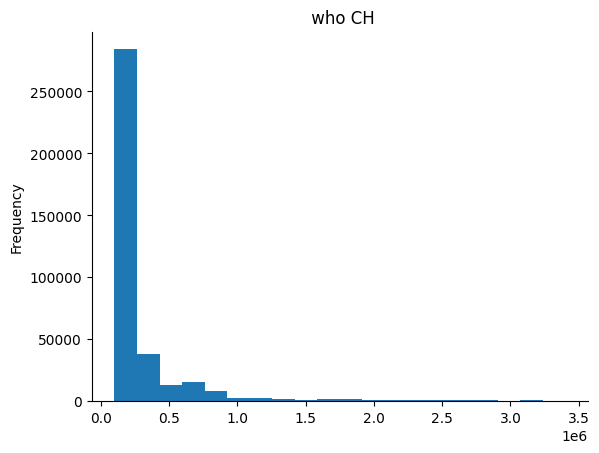

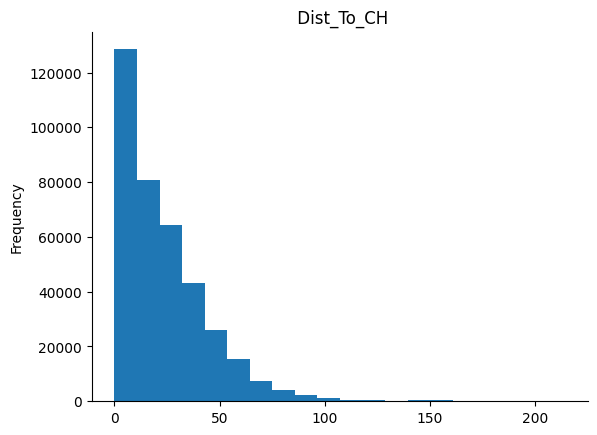

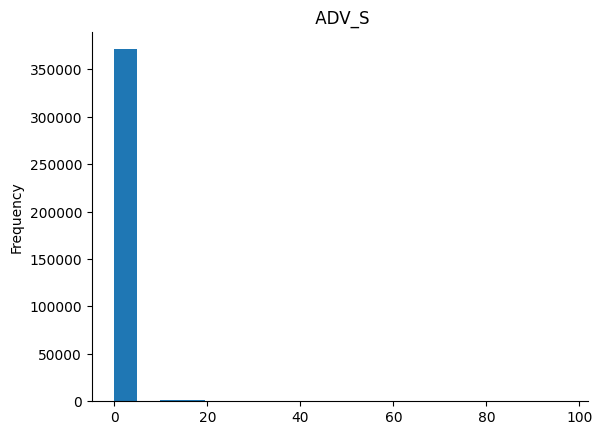

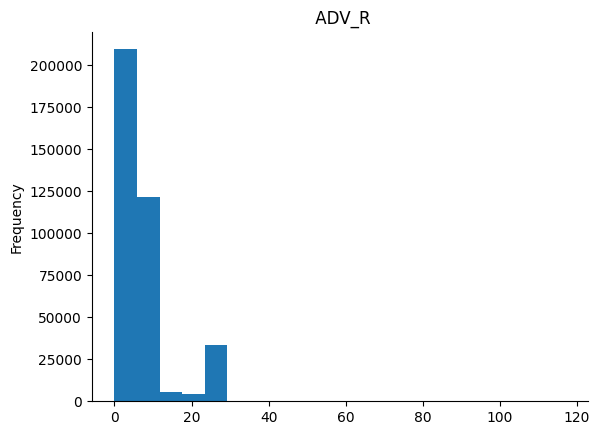

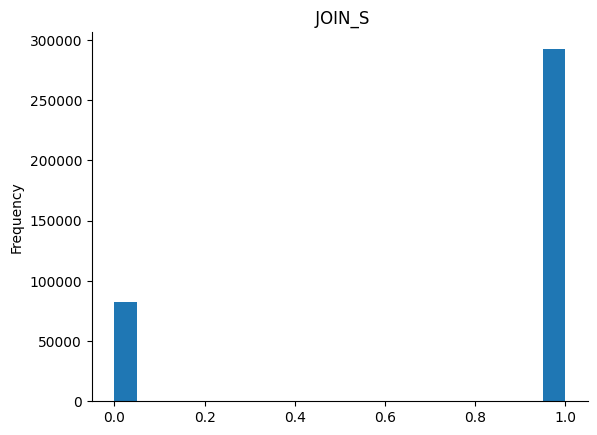

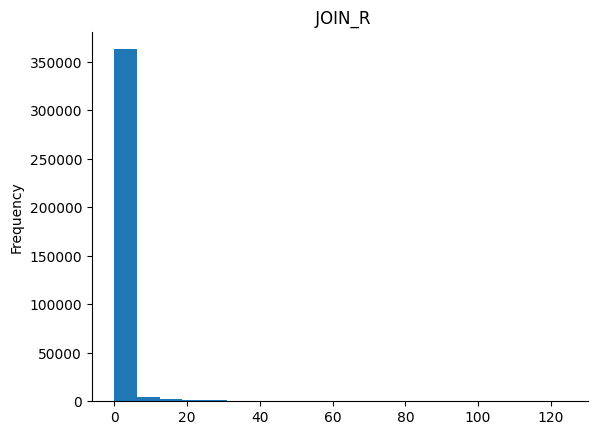

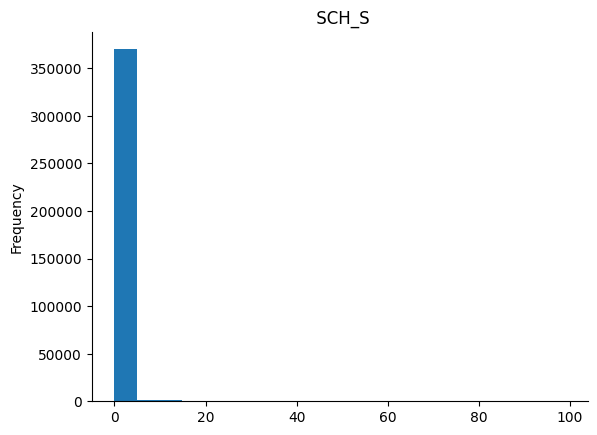

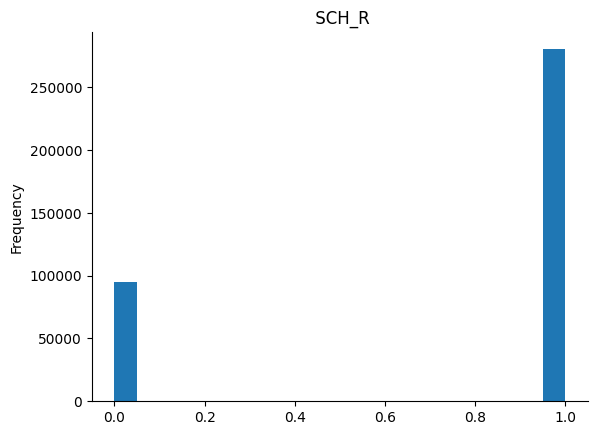

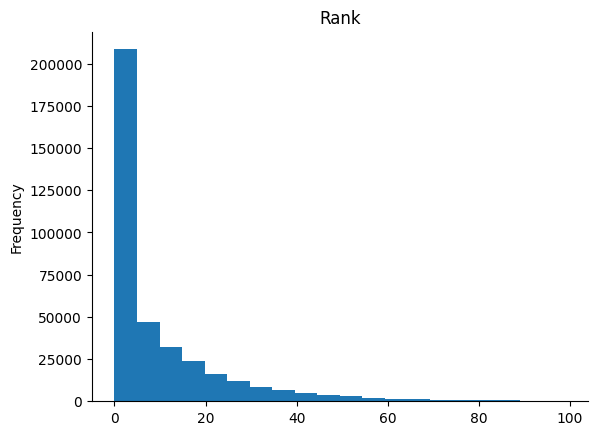

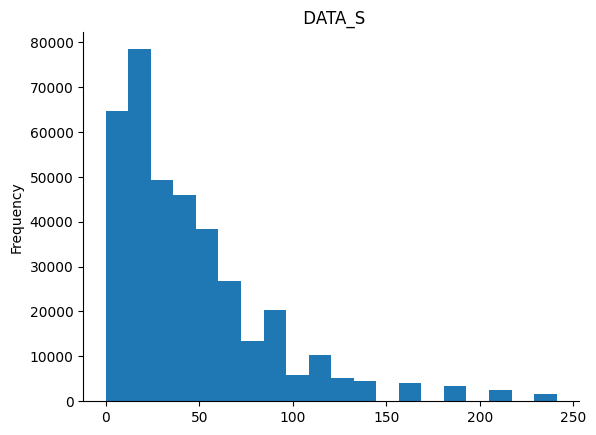

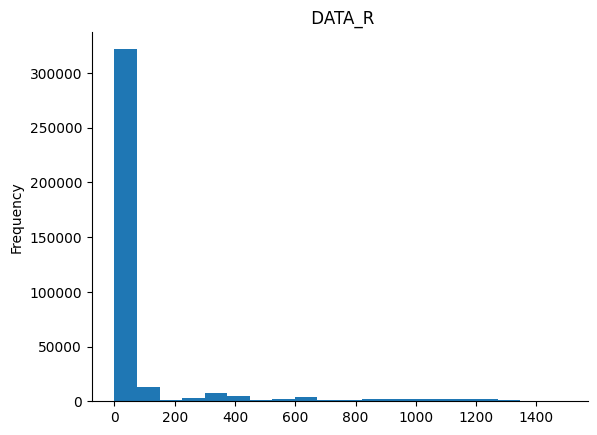

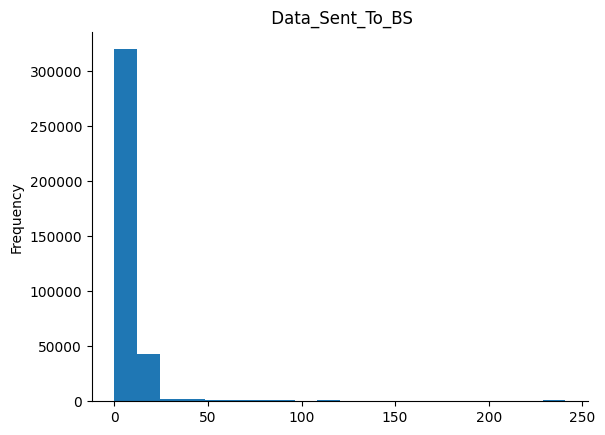

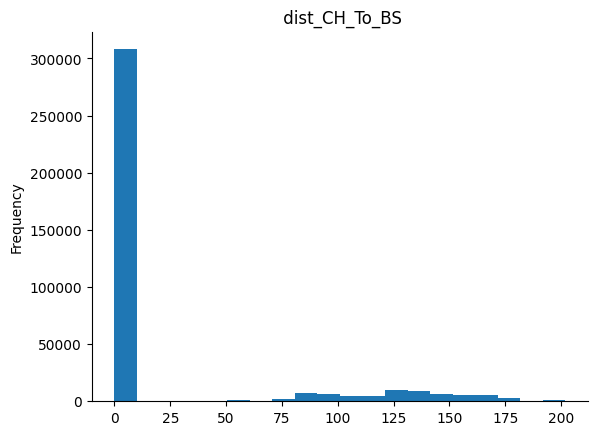

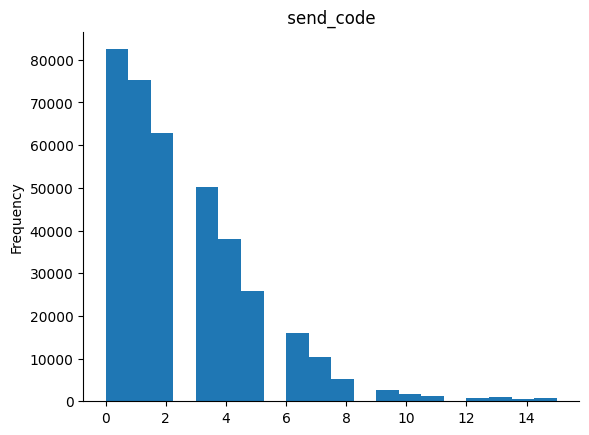

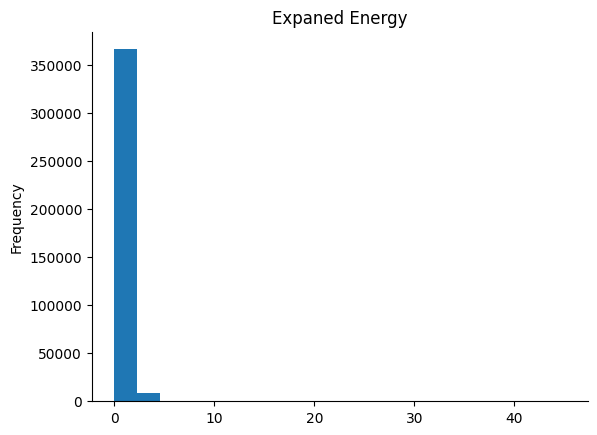

Skipping column 'Attack type' as it is not numeric.


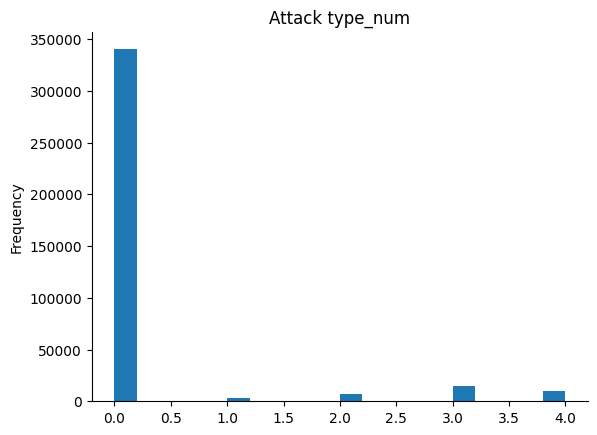

In [ ]:
from matplotlib import pyplot as plt

from matplotlib import pyplot as plt

for col in df.columns:
    # Check if the column contains numeric data before plotting
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col].plot(kind='hist', bins=20, title=col)
        plt.gca().spines[['top', 'right',]].set_visible(False)
        plt.show()
    else:
        print(f"Skipping column '{col}' as it is not numeric.")


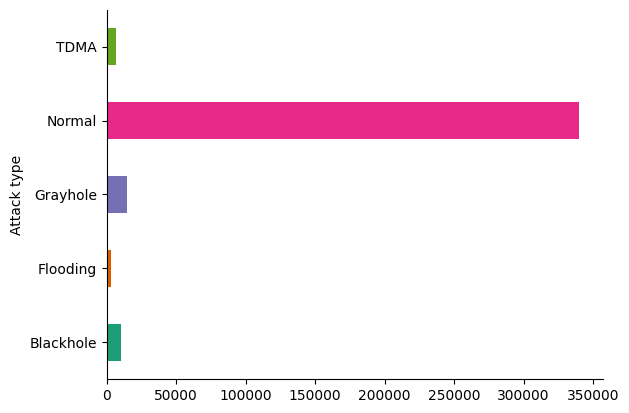

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Attack type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Get unique values from the 'Attack type' column
unique_names = df['Attack type'].unique()

print(unique_names)

['Normal' 'Flooding' 'TDMA' 'Grayhole' 'Blackhole']


In [ ]:
col_names = df.columns
col_names

Index([' id', ' Time', ' Is_CH', ' who CH', ' Dist_To_CH', ' ADV_S', ' ADV_R',
       ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R', 'Rank', ' DATA_S', ' DATA_R',
       ' Data_Sent_To_BS', ' dist_CH_To_BS', ' send_code ', 'Expaned Energy',
       'Attack type'],
      dtype='object')

In [ ]:
# Factorize the 'Name' column
df['Attack type_num'] = pd.factorize(df['Attack type'])[0]

print(df['Attack type_num'])

0         0
1         0
2         0
3         0
4         0
         ..
374656    0
374657    0
374658    0
374659    0
374660    0
Name: Attack type_num, Length: 374661, dtype: int64


In [ ]:
unique_numbers = df['Attack type_num'].unique()
unique_numbers

array([0, 1, 2, 3, 4])

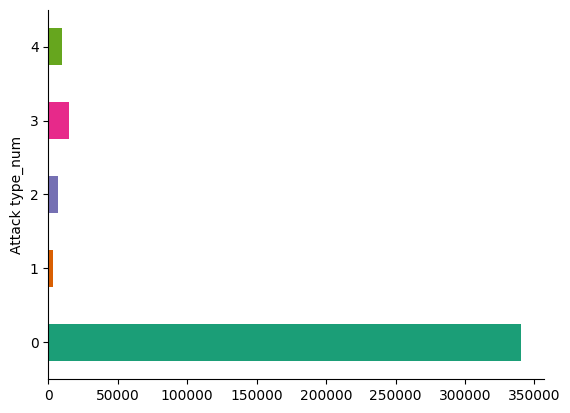

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Attack type_num').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data_raw.shape

(374661, 19)

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

In [ ]:
 data_raw.describe()


,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
count,3.746610e+05,374661.000000,374661.000000,3.746610e+05,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000
mean,2.749693e+05,1064.748712,0.115766,2.749804e+05,22.599380,0.267698,6.940562,0.779905,0.737493,0.288984,0.747452,9.687104,44.857925,73.890045,4.569448,22.562735,2.497957,0.305661
std,3.898986e+05,899.646164,0.319945,3.899112e+05,21.955794,2.061148,7.044319,0.414311,4.691498,2.754746,0.434475,14.681901,42.574464,230.246335,19.679155,50.261604,2.407337,0.669462
min,1.010000e+05,50.000000,0.000000,1.010000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.070930e+05,353.000000,0.000000,1.070960e+05,4.735440,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,13.000000,0.000000,0.000000,0.000000,1.000000,0.056150
50%,1.160710e+05,803.000000,0.000000,1.160720e+05,18.372610,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,3.000000,35.000000,0.000000,0.000000,0.000000,2.000000,0.097970
75%,2.150720e+05,1503.000000,0.000000,2.150730e+05,33.776000,0.000000,7.000000,1.000000,0.000000,0.000000,1.000000,13.000000,62.000000,0.000000,0.000000,0.000000,4.000000,0.217760
max,3.402096e+06,3600.000000,1.000000,3.402100e+06,214.274620,97.000000,117.000000,1.000000,124.000000,99.000000,1.000000,99.000000,241.000000,1496.000000,241.000000,201.934940,15.000000,45.093940


from matplotlib import pyplot as plt
_df_16[' id'].plot(kind='hist', bins=20, title=' id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17[' Time'].plot(kind='hist', bins=20, title=' Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18[' Is_CH'].plot(kind='hist', bins=20, title=' Is_CH')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19[' who CH'].plot(kind='hist', bins=20, title=' who CH')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x=' id', y=' Time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x=' Time', y=' Is_CH', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x=' Is_CH', y=' who CH', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x=' who CH', y=' Dist_To_CH', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[' Time']
  ys = series[' id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values(' Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(' Time')
_ = plt.ylabel(' id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[' Time']
  ys = series[' Is_CH']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values(' Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(' Time')
_ = plt.ylabel(' Is_CH')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[' Time']
  ys = series[' who CH']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values(' Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(' Time')
_ = plt.ylabel(' who CH')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[' Time']
  ys = series[' Dist_To_CH']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values(' Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(' Time')
_ = plt.ylabel(' Dist_To_CH')

from matplotlib import pyplot as plt
_df_28[' id'].plot(kind='line', figsize=(8, 4), title=' id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29[' Time'].plot(kind='line', figsize=(8, 4), title=' Time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30[' Is_CH'].plot(kind='line', figsize=(8, 4), title=' Is_CH')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31[' who CH'].plot(kind='line', figsize=(8, 4), title=' who CH')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
print("Data rows before removing null values",df.shape[0])

Data rows before removing null values 374661


In [ ]:
# check the number of null values per column
print(df.isnull().sum())

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Expaned Energy      0
Attack type         0
Attack type_num     0
dtype: int64


## After Balancing the data

*Summary:*

**Random Oversampling:** Duplicates minority class examples.

**Random Undersampling:** Removes majority class examples.

**SMOTE:** Generates synthetic samples for the minority class.

**ADASYN:** Focuses on generating samples for harder-to-learn minority instances.

**Class Weights:** Adjusts the importance of classes during model training.

These methods can help improve the performance of your machine learning models when dealing with imbalanced datasets. Choose the method that best fits your specific use case and data characteristics.


Balancing a dataset is crucial for training machine learning models, especially when dealing with imbalanced classes. Below are various methods to balance the data, including both oversampling and undersampling techniques, along with code examples using Python's pandas and imbalanced-learn libraries.

In [ ]:
df.columns

Index([' id', ' Time', ' Is_CH', ' who CH', ' Dist_To_CH', ' ADV_S', ' ADV_R',
       ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R', 'Rank', ' DATA_S', ' DATA_R',
       ' Data_Sent_To_BS', ' dist_CH_To_BS', ' send_code ', 'Expaned Energy',
       'Attack type', 'Attack type_num'],
      dtype='object')

In [ ]:
# 1. Using Random Oversampling
# Random oversampling involves duplicating examples from the minority class to balance the class distribution.


import pandas as pd
from imblearn.over_sampling import RandomOverSampler


# Separate features and target
X = df[' id', ' Time', ' Is_CH', ' who CH', ' Dist_To_CH', ' ADV_S', ' ADV_R',
       ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R', 'Rank', ' DATA_S', ' DATA_R',
       ' Data_Sent_To_BS', ' dist_CH_To_BS', ' send_code ', 'Expaned Energy']
y = df['Attack type_num']

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new balanced DataFrame
df_balanced1 = pd.DataFrame(X_resampled, columns=[' id', ' Time', ' Is_CH', ' who CH', ' Dist_To_CH', ' ADV_S', ' ADV_R',
       ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R', 'Rank', ' DATA_S', ' DATA_R',
       ' Data_Sent_To_BS', ' dist_CH_To_BS', ' send_code ', 'Expaned Energy'])
df_balanced1['Attack type_num'] = y_resampled

print(df_balanced1)


In [ ]:
# 2. Using Random Undersampling
# Random undersampling involves removing examples from the majority class to balance the class distribution.

from imblearn.under_sampling import RandomUnderSampler

# Apply Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Create a new balanced DataFrame
df_balanced2 = pd.DataFrame(X_resampled, columns=['Feature1'])
df_balanced2['Class'] = y_resampled

print(df_balanced2)

In [ ]:
# 3. Using SMOTE (Synthetic Minority Over-sampling Technique)
# SMOTE generates synthetic samples for the minority class.

from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=['Feature1'])
df_balanced['Class'] = y_resampled

print(df_balanced)

In [ ]:
# 4. Using ADASYN (Adaptive Synthetic Sampling)
#ADASYN is an extension of SMOTE that focuses on generating samples for minority class instances that are harder to learn.

from imblearn.over_sampling import ADASYN

# Apply ADASYN
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Create a new balanced DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=['Feature1'])
df_balanced['Class'] = y_resampled

print(df_balanced)

In [ ]:
# 5. Using Class Weights
# Instead of resampling, you can also use class weights in your model to give more importance to the minority class.

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model with class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the model
model.fit(X, y)

## Training section

#### Imbalanced dataset


Step 1: Set Up Your Environment

Ensure you have TensorFlow installed and access to a TPU.

Import necessary libraries.

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

Step 2: Prepare Your Data

Load your dataset and preprocess it (e.g., normalization, encoding).

Split the data into features and labels.

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

# Load your dataset
data_imbalanced = df.copy()

# Preprocess your data
# Example: Normalize features and encode labels
X = data_imbalanced.drop('Attack type', axis=1).values  # Features
y = data_imbalanced['Attack type'].values  # Labels

# Convert string labels to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Check the number of unique classes present in the encoded labels.
num_classes = len(np.unique(y))

## Now you can use to_categorical
# Adjust num_classes based on the unique values in the labels.
y = tf.keras.utils.to_categorical(y, num_classes=num_classes )  # Adding 1 because we want num_classes to be one more than the maximum value in our labels.

y

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 3: Define the ANN-MLP Model

Create a function to build the model with three hidden layers.

In [ ]:
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(X.shape[1],)))
    model.add(tf.keras.layers.Dense(128, activation='relu'))  # First hidden layer
    model.add(tf.keras.layers.Dense(64, activation='relu'))   # Second hidden layer
    model.add(tf.keras.layers.Dense(32, activation='relu'))   # Third hidden layer
    model.add(tf.keras.layers.Dense(5, activation='softmax')) # Output layer for 5 classes
    return model

Step 4: Compile the Model

Compile the model with an appropriate optimizer and loss function.

In [ ]:
model = create_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Step 5: Set Up TPU Strategy

Use TensorFlow's TPU strategy for distributed training.

In [ ]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

strategy = tf.distribute.TPUStrategy(resolver)

Step 6: Train the Model

Train the model using the TPU strategy.

In [ ]:
# Compile and train the model
with strategy.scope():
    model = create_model()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])
    history = model.fit(X_train, y_train, epochs=20, # 3, # 50,
              batch_size=1024,  # Adjust epochs and batch size as needed
              validation_split=0.2)  # Added validation_split


Epoch 1/3
235/235 [==============================] - 10s 30ms/step - loss: 2163.9565 - accuracy: 0.7532 - auc: 0.8473 - val_loss: 524.5654 - val_accuracy: 0.9062 - val_auc: 0.9414
Epoch 2/3
235/235 [==============================] - 3s 14ms/step - loss: 514.6669 - accuracy: 0.7598 - auc: 0.8512 - val_loss: 276.4709 - val_accuracy: 0.9062 - val_auc: 0.9414
Epoch 3/3
235/235 [==============================] - 3s 15ms/step - loss: 518.6237 - accuracy: 0.7689 - auc: 0.8577 - val_loss: 208.1044 - val_accuracy: 0.9062 - val_auc: 0.9414


In [ ]:
# Evaluate the model
test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test)  # Unpack all returned values
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test AUC: {test_auc:.4f}')  # Print AUC if desired

2342/2342 [==============================] - 21s 9ms/step - loss: 201.4043 - accuracy: 0.9070 - auc: 0.9419
Test accuracy: 0.9070
Test AUC: 0.9419


In [ ]:
# Generate predictions for the classification report
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Get the predicted class labels
y_true = np.argmax(y_test, axis=1)       # Get the true class labels



2342/2342 [==============================] - 19s 8ms/step


In [ ]:
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2043
           1       0.00      0.00      0.00       631
           2       0.00      0.00      0.00      2985
           3       0.91      1.00      0.95     67965
           4       0.00      0.00      0.00      1309

    accuracy                           0.91     74933
   macro avg       0.18      0.20      0.19     74933
weighted avg       0.82      0.91      0.86     74933



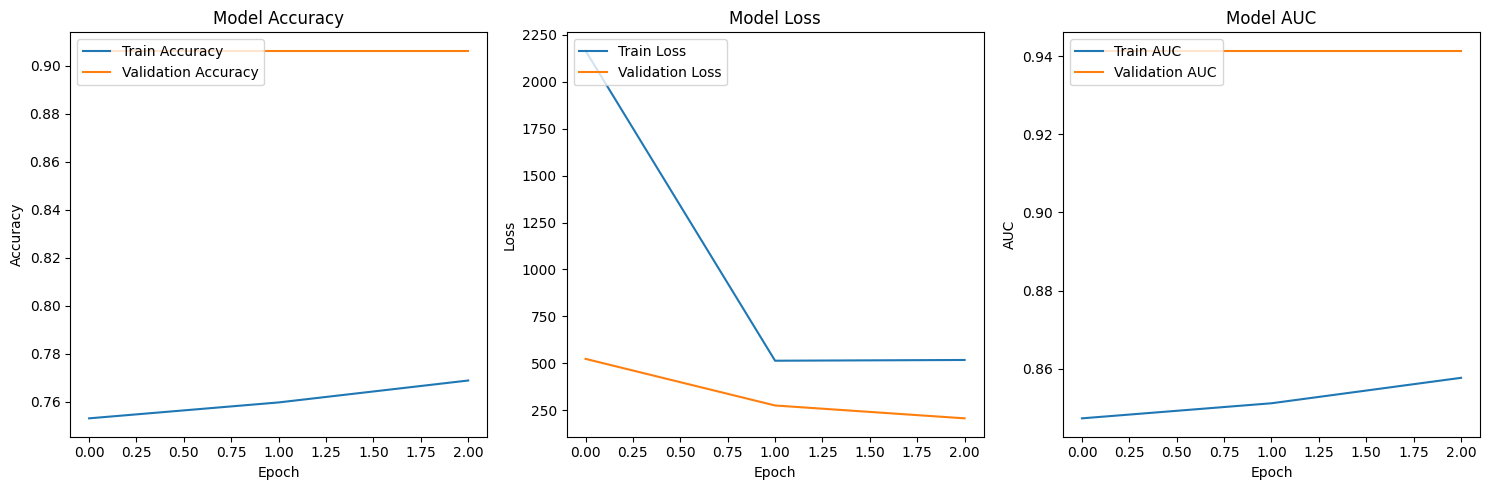

In [ ]:
# Plotting the training history
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation AUC values
    plt.subplot(1, 3, 3)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title('Model AUC')
    plt.ylabel('AUC')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot the history
plot_history(history)

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('data.csv')  # Replace with your actual data file

# Preprocess your data
# Assuming the last column is the label
X = data.drop('label', axis=1).values  # Features
y = data['label'].values  # Labels

# Convert labels to one-hot encoding
y = tf.keras.utils.to_categorical(y, num_classes=5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(X.shape[1],)))
    model.add(tf.keras.layers.Dense(128, activation='relu'))  # First hidden layer
    model.add(tf.keras.layers.Dense(64, activation='relu'))   # Second hidden layer
    model.add(tf.keras.layers.Dense(32, activation='relu'))   # Third hidden layer
    model.add(tf.keras.layers.Dense(5, activation='softmax')) # Output layer for 5 classes
    return model

# Set up TPU
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='your-tpu-name')  # Replace with your TPU name
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

# Compile and train the model
with strategy.scope():
    model = create_model()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model and capture the history
    history = model.fit(X_train, y_train, epochs=50, batch_size=1024, validation_split=0.2)  # Adjust epochs and batch size as needed

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Plotting the training history
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot the history
plot_history(history)

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load your dataset
data = pd.read_csv('data.csv')  # Replace with your actual data file

# Preprocess your data
# Assuming the last column is the label
X = data.drop('label', axis=1).values  # Features
y = data['label'].values  # Labels

# Convert labels to one-hot encoding
y = tf.keras.utils.to_categorical(y, num_classes=5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(X.shape[1],)))
    model.add(tf.keras.layers.Dense(128, activation='relu'))  # First hidden layer
    model.add(tf.keras.layers.Dense(64, activation='relu'))   # Second hidden layer
    model.add(tf.keras.layers.Dense(32, activation='relu'))   # Third hidden layer
    model.add(tf.keras.layers.Dense(5, activation='softmax')) # Output layer for 5 classes
    return model

# Set up TPU
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='your-tpu-name')  # Replace with your TPU name
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

# Compile and train the model
with strategy.scope():
    model = create_model()
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

    # Train the model and capture the history
    history = model.fit(X_train, y_train, epochs=50, batch_size=1024, validation_split=0.2)  # Adjust epochs and batch size as needed

# Evaluate the model
test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}, Test AUC: {test_auc:.4f}')

# Plotting the training history
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation AUC values
    plt.subplot(1, 3, 3)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title('Model AUC')
    plt.ylabel('AUC')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot the history
plot_history(history)

#### Balanced dataset:

There are several other methods for balancing datasets, including:

Random Oversampling: This method involves randomly duplicating examples from the minority class until the classes are balanced.

Random Undersampling: This method involves randomly removing examples from the majority class to balance the dataset.

ADASYN (Adaptive Synthetic Sampling): This is an extension of SMOTE that focuses on generating synthetic samples for minority class examples that are harder to classify.

Tomek Links: This method removes examples from the majority class that are close to the minority class examples.

Below, I will add functions for these methods and integrate them into the previous code. You can choose which method to use for balancing the dataset.

Updated Code with Multiple Balancing Methods


In [ ]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.layers import BatchNormalization, Dropout
from imblearn.over_sampling import SMOTE, ADASYN  # Import SMOTE and ADASYN
from imblearn.under_sampling import RandomUnderSampler  # Import Random Undersampling
from imblearn.over_sampling import RandomOverSampler  # Import Random Oversampling
from imblearn.combine import SMOTEENN  # Import SMOTE + Edited Nearest Neighbors

# Function to load and preprocess data
def load_and_preprocess_data(file_path, label_column):
    data = pd.read_csv(file_path)  # Load the dataset
    X = data.drop(label_column, axis=1).values  # Features
    y = data[label_column].values  # Labels

    # Convert labels to one-hot encoding
    num_classes = len(np.unique(y))
    y = tf.keras.utils.to_categorical(y, num_classes=num_classes)

    return X, y

# Function to balance the dataset using Random Oversampling
def random_oversample(X, y):
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, np.argmax(y, axis=1))
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=y.shape[1])
    return X_resampled, y_resampled

# Function to balance the dataset using Random Undersampling
def random_undersample(X, y):
    rus = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X, np.argmax(y, axis=1))
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=y.shape[1])
    return X_resampled, y_resampled

# Function to balance the dataset using SMOTE
def smote_balance(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, np.argmax(y, axis=1))
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=y.shape[1])
    return X_resampled, y_resampled

# Function to balance the dataset using ADASYN
def adasyn_balance(X, y):
    adasyn = ADASYN(random_state=42)
    X_resampled, y_resampled = adasyn.fit_resample(X, np.argmax(y, axis=1))
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=y.shape[1])
    return X_resampled, y_resampled

# Function to balance the dataset using SMOTE + ENN
def smote_enn_balance(X, y):
    smote_enn = SMOTEENN(random_state=42)
    X_resampled, y_resampled = smote_enn.fit_resample(X, np.argmax(y, axis=1))
    y_resampled = tf.keras.utils.to_categorical(y_resampled, num_classes=y.shape[1])
    return X_resampled, y_resampled

# Define the model
def create_model(optimizer='adam', learning_rate=0.001, dropout_rate=0.2):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(X.shape[1],)))
    model.add(tf.keras.layers.Dense(128, activation='relu'))  # First hidden layer
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(64, activation='relu'))   # Second hidden layer
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(32, activation='relu'))   # Third hidden layer
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(y.shape[1], activation='softmax'))  # Output layer for classes
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', 'AUC']) #tf.keras.metrics.AUC(name='auc')])
    return model

# Function to save results
def save_results(model_name, accuracy, auc, report):
    results_dir = 'model_results'
    os.makedirs(results_dir, exist_ok=True)  # Create directory if it doesn't exist

    # Save results to a text file
    with open(os.path.join(results_dir, f'{model_name}_results.txt'), 'w') as f:
        f.write(f'Model Name: {model_name}\n')
        f.write(f'Test Accuracy: {accuracy:.4f}\n')
        f.write(f'Test AUC: {auc:.4f}\n')
        f.write('\nClassification Report:\n')
        f.write(report)

# Plotting function
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation AUC values
    plt.subplot(1, 3, 3)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title('Model AUC')
    plt.ylabel('AUC')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

In [ ]:
# Updated Code with Results Storage and Plotting Function
# Here’s how you can implement this:

# Function to plot the distribution of the target variable
def plot_target_distribution(y, method_name):
    plt.figure(figsize=(8, 6))
    plt.hist(y, bins=10, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Distribution of Target Variable after {method_name}')
    plt.xlabel('Class Labels')
    plt.ylabel('Frequency')
    plt.show()


# Function to evaluate model with different balancing methods
def evaluate_balancing_methods(X, y):
    methods = {
        'Random Oversampling': random_oversample,
        'Random Undersampling': random_undersample,
        'SMOTE': smote_balance,
        'ADASYN': adasyn_balance,
        'SMOTE + ENN': smote_enn_balance
    }

    results = {}

    for method_name, method in methods.items():
        print(f"Evaluating method: {method_name}")
        X_resampled, y_resampled = method(X, y)

        # Plot the distribution of the target variable
        plot_target_distribution(y_resampled, method_name)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

        # Create and train the model
        model = create_model()
        history = model.fit(X_train, y_train, epochs=10, #50,
                            batch_size=1024, validation_split=0.2, verbose=0)

        # Evaluate the model
        test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test, verbose=0)

        # Store results
        results[method_name] = {
            'accuracy': test_accuracy,
            'auc': test_auc
        }

    return results

# Function to plot results
def plot_results(results):
    methods = list(results.keys())
    accuracies = [results[method]['accuracy'] for method in methods]
    aucs = [results[method]['auc'] for method in methods]

    x = np.arange(len(methods))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', color='b')
    bars2 = ax.bar(x + width/2, aucs, width, label='AUC', color='g')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('Model Performance by Balancing Method')
    ax.set_xticks(x)
    ax.set_xticklabels(methods)
    ax.legend()

    # Adding value labels on top of the bars
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Main execution block
if __name__ == "__main__":
    # Load and preprocess the dataset
    file_path = '/content/WSN-DS.csv'  # Replace with your actual data file
    label_column = 'Attack type'   # Replace with the actual label column name
    X, y = load_and_preprocess_data(file_path, label_column)

    # Evaluate all balancing methods
    results = evaluate_balancing_methods(X, y)

    # Plot the results
    plot_results(results)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Attack type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Several models

Summary of the Code:
Model Architectures:

CNN: A convolutional neural network suitable for sequence data.
LSTM: A long short-term memory network designed for sequence prediction problems.
RNN: A simple recurrent neural network for sequence data.
Evaluation Function:

The evaluate_balancing_methods function applies various balancing techniques to the dataset, evaluates each model architecture (CNN, LSTM, RNN), and stores the results.
Main Execution Block:

Loads and preprocesses the dataset.
Plots the original distribution of the target variable.
Evaluates the models and plots the results.
Usage:
Ensure you have the necessary libraries installed (e.g., TensorFlow, NumPy, Matplotlib).
Replace 'data.csv' and 'label' with your actual dataset and label column.
Run the script, and it will evaluate each balancing method and model architecture, providing visualizations of the target distributions and performance metrics.
This comprehensive setup allows you to compare the performance of different model architectures after applying various balancing methods, giving you insights into the best approach for

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, SimpleRNN

# Function to create a CNN model
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])
    return model

# Function to create an LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])
    return model

# Function to create an RNN model
def create_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(64, input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])
    return model

# Function to evaluate model with different balancing methods and architectures
def evaluate_balancing_methods(X, y):
    methods = {
        'Random Oversampling': random_oversample,
        'Random Undersampling': random_undersample,
        'SMOTE': smote_balance,
        'ADASYN': adasyn_balance,
        'SMOTE + ENN': smote_enn_balance
    }

    architectures = {
        'CNN': create_cnn_model,
        'LSTM': create_lstm_model,
        'RNN': create_rnn_model
    }

    results = {}

    for method_name, method in methods.items():
        print(f"Evaluating method: {method_name}")
        X_resampled, y_resampled = method(X, y)

        # Plot the distribution of the target variable
        plot_target_distribution(y_resampled, method_name)

        for architecture_name, architecture in architectures.items():
            print(f"Evaluating architecture: {architecture_name}")

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

            # Create and train the model
            model = architecture(X_train.shape[1:])
            history = model.fit(X_train, y_train, epochs=50, batch_size=1024, validation_split=0.2, verbose=0)

            # Evaluate the model
            test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test, verbose=0)

            # Store results
            if method_name not in results:
                results[method_name] = {}
            results[method_name][architecture_name] = {
                'accuracy': test_accuracy,
                'auc': test_auc
            }

    return results

# Main execution block
if __name__ == "__main__":
    # Load and preprocess the dataset
    file_path = 'data.csv'  # Replace with your actual data file
    label_column = 'label'   # Replace with the actual label column name
    X, y = load_and_preprocess_data(file_path, label_column)

    # Plot the original distribution of the target variable
    plt.figure(figsize=(8, 6))
    plt.hist(y, bins=10, alpha=0.7, color='blue', edgecolor='black')
    plt.title('Original Distribution of Target Variable')
    plt.xlabel('Class Labels')
    plt.ylabel('Frequency')
    plt.show()

    # Evaluate all balancing methods and architectures
    results = evaluate_balancing_methods(X, y)

    # Plot the results
    plot_results(results)

To enhance the previous code with advanced features and improvements, we can consider the following additions:

Early Stopping: To prevent overfitting during training.

Model Checkpointing: To save the best model based on validation performance.

Hyperparameter Tuning: Using GridSearchCV or RandomizedSearchCV for model optimization.

Cross-Validation: To ensure the model's robustness.

Confusion Matrix and Classification Report: For better evaluation of model performance.

Visualization of Training History: To analyze the training process.

Here’s the updated code with these features:

Key Enhancements Explained:
Early Stopping:

The EarlyStopping callback monitors the validation loss and stops training if it doesn't improve for a specified number of epochs (patience).
Model Checkpointing:

The ModelCheckpoint callback saves the model with the best validation loss during training, allowing you to restore the best model after training.
Stratified K-Fold Cross-Validation:

This method ensures that each fold has the same proportion of class labels as the entire dataset, providing a more reliable evaluation of the model's performance.
Confusion Matrix and Classification Report:

After each fold, the confusion matrix and classification report are printed to provide insights into the model's performance on different classes.
Plotting Training History:

The plot_training_history function visualizes the training and validation accuracy and loss over epochs, helping to analyze the training process.
Usage:
Ensure you have the necessary libraries installed (e.g., TensorFlow, NumPy, Matplotlib, scikit-learn).
Replace 'data.csv' and 'label' with your actual dataset and label column.
Run the script, and it will evaluate each balancing method and model architecture, providing visualizations of the target distributions, performance metrics, and training history.
This enhanced code structure allows for a more robust evaluation of different model architectures and balancing methods, providing deeper insights into their performance.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# Function to create a CNN model
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])
    return model

# Function to create an LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])
    return model

# Function to create an RNN model
def create_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(64, input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])
    return model

# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()

# Function to evaluate model with different balancing methods and architectures
def evaluate_balancing_methods(X, y):
    methods = {
        'Random Oversampling': random_oversample,
        'Random Undersampling': random_undersample,
        'SMOTE': smote_balance,
        'ADASYN': adasyn_balance,
        'SMOTE + ENN': smote_enn_balance
    }

    architectures = {
        'CNN': create_cnn_model,
        'LSTM': create_lstm_model,
        'RNN': create_rnn_model
    }

    results = {}

    for method_name, method in methods.items():
        print(f"Evaluating method: {method_name}")
        X_resampled, y_resampled = method(X, y)

        # Convert labels to categorical
        y_resampled = to_categorical(y_resampled)

        # Plot the distribution of the target variable
        plot_target_distribution(y_resampled, method_name)

        for architecture_name, architecture in architectures.items():
            print(f"Evaluating architecture: {architecture_name}")

            # Stratified K-Fold Cross-Validation
            skf = StratifiedKFold(n_splits=5)
            fold_results = []

            for train_index, test_index in skf.split(X_resampled, np.argmax(y_resampled, axis=1)):
                X_train, X_test = X_resampled[train_index], X_resampled[test_index]
                y_train, y_test = y_resampled[train_index], y_resampled[test_index]

                # Create the model
                model = architecture(X_train.shape[1:])

                # Callbacks for early stopping and model checkpointing
                early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
                model_checkpoint = ModelCheckpoint(f'{architecture_name}_best_model.h5', save_best_only=True)

                # Train the model
                history = model.fit(X_train, y_train, epochs=50, batch_size=1024,
                                    validation_split=0.2, verbose=0,
                                    callbacks=[early_stopping, model_checkpoint])

                # Evaluate the model
                test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test, verbose=0)
                fold_results.append((test_accuracy, test_auc))

                # Generate predictions and evaluate
                y_pred = model.predict(X_test)
                y_pred_classes = np.argmax(y_pred, axis=1)
                y_true_classes = np.argmax(y_test, axis=1)

                # Print confusion matrix and classification report
                print(f"Confusion Matrix for fold: {len(fold_results)}")
                print(confusion_matrix(y_true_classes, y_pred_classes))
                print(classification_report(y_true_classes, y_pred_classes))

            # Average results across folds
            avg_accuracy = np.mean([result[0] for result in fold_results])
            avg_auc = np.mean([result[1] for result in fold_results])

            # Store results
            if method_name not in results:
                results[method_name] = {}
            results[method_name][architecture_name] = {
                'accuracy': avg_accuracy,
                'auc': avg_auc
            }

            # Plot training history for the last fold
            plot_training_history(history)

    return results

# Main execution block
if __name__ == "__main__":
    # Load and preprocess the dataset
    file_path = 'data.csv'  # Replace with your actual data file
    label_column = 'label'   # Replace with the actual label column name
    X, y = load_and_preprocess_data(file_path, label_column)

    # Plot the original distribution of the target variable
    plt.figure(figsize=(8, 6))
    plt.hist(y, bins=10, alpha=0.7, color='blue', edgecolor='black')
    plt.title('Original Distribution of Target Variable')
    plt.xlabel('Class Labels')
    plt.ylabel('Frequency')
    plt.show()

    # Evaluate all balancing methods and architectures
    results = evaluate_balancing_methods(X, y)

    # Plot the results
    plot_results(results)

To further enhance the model evaluation process, we can add additional efficient architectures such as:

GRU (Gated Recurrent Unit): A simpler alternative to LSTM that can perform similarly in many cases.

Bidirectional LSTM: This architecture processes the input sequence in both forward and backward directions, potentially capturing more context.

1D Convolutional Neural Network (1D CNN): This can be effective for sequence data and can be combined with LSTM or GRU layers for better performance.

WHere’s the updated code with these additional architectures:

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, SimpleRNN, GRU, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# Function to create a 1D CNN model
def create_1d_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])
    return model

# Function to create a Bidirectional LSTM model
def create_bidirectional_lstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])
    return model

# Function to create a GRU model
def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(64, input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])
    return model

# Function to evaluate model with different balancing methods and architectures
def evaluate_balancing_methods(X, y):
    methods = {
        'Random Oversampling': random_oversample,
        'Random Undersampling': random_undersample,
        'SMOTE': smote_balance,
        'ADASYN': adasyn_balance,
        'SMOTE + ENN': smote_enn_balance
    }

    architectures = {
        '1D CNN': create_1d_cnn_model,
        'Bidirectional LSTM': create_bidirectional_lstm_model,
        'GRU': create_gru_model,
        'LSTM': create_lstm_model,
        'RNN': create_rnn_model
    }

    results = {}

    for method_name, method in methods.items():
        print(f"Evaluating method: {method_name}")
        X_resampled, y_resampled = method(X, y)

        # Convert labels to categorical
        y_resampled = to_categorical(y_resampled)

        # Plot the distribution of the target variable
        plot_target_distribution(y_resampled, method_name)

        for architecture_name, architecture in architectures.items():
            print(f"Evaluating architecture: {architecture_name}")

            # Stratified K-Fold Cross-Validation
            skf = StratifiedKFold(n_splits=5)
            fold_results = []

            for train_index, test_index in skf.split(X_resampled, np.argmax(y_resampled, axis=1)):
                X_train, X_test = X_resampled[train_index], X_resampled[test_index]
                y_train, y_test = y_resampled[train_index], y_resampled[test_index]

                # Create the model
                model = architecture(X_train.shape[1:])

                # Callbacks for early stopping and model checkpointing
                early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
                model_checkpoint = ModelCheckpoint(f'{architecture_name}_best_model.h5', save_best_only=True)

                # Train the model
                history = model.fit(X_train, y_train, epochs=50, batch_size=1024,
                                    validation_split=0.2, verbose=0,
                                    callbacks=[early_stopping, model_checkpoint])

                # Evaluate the model
                test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test, verbose=0)
                fold_results.append((test_accuracy, test_auc))

                # Generate predictions and evaluate
                y_pred = model.predict(X_test)
                y_pred_classes = np.argmax(y_pred, axis=1)
                y_true_classes = np.argmax(y_test, axis=1)

                # Print confusion matrix and classification report
                print(f"Confusion Matrix for fold: {len(fold_results)}")
                print(confusion_matrix(y_true_classes, y_pred_classes))
                print(classification_report(y_true_classes, y_pred_classes))

            # Average results across folds
            avg_accuracy = np.mean([result[0] for result in fold_results])
            avg_auc = np.mean([result[1] for result in fold_results])

            # Store results
            if method_name not in results:
                results[method_name] = {}
            results[method_name][architecture_name] = {
                'accuracy': avg_accuracy,
                'auc': avg_auc
            }

            # Plot training history for the last fold
            plot_training_history(history)

    return results



Key Additions Explained:

1D CNN Model:

This architecture is designed to handle sequence data effectively, using convolutional layers to extract features from the input sequences.

Bidirectional LSTM Model:

This model processes the input sequence in both directions, which can help capture dependencies that may be missed by a unidirectional LSTM.

GRU Model:

The GRU architecture is a simpler alternative to LSTM, often providing similar performance with fewer parameters, making it computationally efficient.

Usage:

Ensure you have the necessary libraries installed (e.g., TensorFlow, NumPy, Matplotlib, scikit-learn).
Replace 'data.csv' and 'label' with your actual dataset and label column.
Run the script, and it will evaluate each balancing method and model architecture, providing visualizations of the target distributions, performance metrics, and training history.
This enhanced code structure allows for a more comprehensive evaluation of various model architectures, providing insights into their performance across different data balancing methods.

In [ ]:
# Main execution block
if __name__ == "__main__":
    # Load and preprocess the dataset
    file_path = 'data.csv'  # Replace with your actual data file
    label_column = 'label'   # Replace with the actual label column name
    X, y = load_and_preprocess_data(file_path, label_column)

    # Plot the original distribution of the target variable
    plt.figure(figsize=(8, 6))
    plt.hist(y, bins=10, alpha=0.7, color='blue', edgecolor='black')
    plt.title('Original Distribution of Target Variable')
    plt.xlabel('Class Labels')
    plt.ylabel('Frequency')
    plt.show()

    # Evaluate all balancing methods and architectures
    results = evaluate_balancing_methods(X, y)

    # Plot the results
    plot_results(results)

To create a combined architecture that integrates a Convolutional Neural Network (CNN) with a ResNet101 backbone, we can leverage the pre-trained ResNet101 model as a feature extractor. This approach allows us to benefit from the deep learning capabilities of ResNet while also incorporating additional convolutional layers for specific tasks.

Here’s how you can implement a combined CNN and ResNet101 architecture in the previous code:

Updated Code with Combined CNN and ResNet101 Architecture

In [ ]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Function to create a combined CNN and ResNet101 model
def create_cnn_resnet_model(input_shape):
    # Input layer
    input_tensor = Input(shape=input_shape)

    # Load ResNet101 model with pre-trained weights, excluding the top layers
    base_model = ResNet101(weights='imagenet', include_top=False, input_tensor=input_tensor)

    # Add custom layers on top of ResNet101
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    output = Dense(2, activation='softmax')(x)

    # Create the model
    model = Model(inputs=base_model.input, outputs=output)

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'auc'])
    return model

# Update the architectures dictionary to include the new model
architectures = {
    '1D CNN': create_1d_cnn_model,
    'Bidirectional LSTM': create_bidirectional_lstm_model,
    'GRU': create_gru_model,
    'LSTM': create_lstm_model,
    'RNN': create_rnn_model,
    'CNN + ResNet101': create_cnn_resnet_model  # New architecture added here
}

# Function to evaluate model with different balancing methods and architectures
def evaluate_balancing_methods(X, y):
    methods = {
        'Random Oversampling': random_oversample,
        'Random Undersampling': random_undersample,
        'SMOTE': smote_balance,
        'ADASYN': adasyn_balance,
        'SMOTE + ENN': smote_enn_balance
    }

    results = {}

    for method_name, method in methods.items():
        print(f"Evaluating method: {method_name}")
        X_resampled, y_resampled = method(X, y)

        # Convert labels to categorical
        y_resampled = to_categorical(y_resampled)

        # Plot the distribution of the target variable
        plot_target_distribution(y_resampled, method_name)

        for architecture_name, architecture in architectures.items():
            print(f"Evaluating architecture: {architecture_name}")

            # Stratified K-Fold Cross-Validation
            skf = StratifiedKFold(n_splits=5)
            fold_results = []

            for train_index, test_index in skf.split(X_resampled, np.argmax(y_resampled, axis=1)):
                X_train, X_test = X_resampled[train_index], X_resampled[test_index]
                y_train, y_test = y_resampled[train_index], y_resampled[test_index]

                # Create the model
                model = architecture(X_train.shape[1:])

                # Callbacks for early stopping and model checkpointing
                early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
                model_checkpoint = ModelCheckpoint(f'{architecture_name}_best_model.h5', save_best_only=True)

                # Train the model
                history = model.fit(X_train, y_train, epochs=50, batch_size=1024,
                                    validation_split=0.2, verbose=0,
                                    callbacks=[early_stopping, model_checkpoint])

                # Evaluate the model
                test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test, verbose=0)
                fold_results.append((test_accuracy, test_auc))

                # Generate predictions and evaluate
                y_pred = model.predict(X_test)
                y_pred_classes = np.argmax(y_pred, axis=1)
                y_true_classes = np.argmax(y_test, axis=1)

                # Print confusion matrix and classification report
                print(f"Confusion Matrix for fold: {len(fold_results)}")
                print(confusion_matrix(y_true_classes, y_pred_classes))
                print(classification_report(y_true_classes, y_pred_classes))

            # Average results across folds
            avg_accuracy = np.mean([result[0] for result in fold_results])
            avg_auc = np.mean([result[1] for result in fold_results])

            # Store results
            if method_name not in results:
                results[method_name] = {}
            results[method_name][architecture_name] = {
                                'accuracy': avg_accuracy,
                'auc': avg_auc
            }

            # Plot training history for the last fold
            plot_training_history(history)

    return results

# Main execution block
if __name__ == "__main__":
    # Load and preprocess the dataset
    file_path = 'data.csv'  # Replace with your actual data file
    label_column = 'label'   # Replace with the actual label column name
    X, y = load_and_preprocess_data(file_path, label_column)

    # Plot the original distribution of the target variable
    plt.figure(figsize=(8, 6))
    plt.hist(y, bins=10, alpha=0.7, color='blue', edgecolor='black')
    plt.title('Original Distribution of Target Variable')
    plt.xlabel('Class Labels')
    plt.ylabel('Frequency')
    plt.show()

    # Evaluate all balancing methods and architectures
    results = evaluate_balancing_methods(X, y)

    # Plot the results
    plot_results(results)


Key Additions Explained:

Combined CNN and ResNet101 Model:

The create_cnn_resnet_model function initializes a ResNet101 model without the top layers, allowing us to add custom layers for our specific classification task.
The model uses GlobalAveragePooling2D to reduce the dimensionality of the output from ResNet101, followed by a dense layer and a dropout layer to prevent overfitting.
Integration into Evaluation:

The new architecture is added to the architectures dictionary, allowing it to be evaluated alongside other models during the training and validation process.
Results Storage:

The results of each architecture and balancing method are stored in a structured format, making it easy to analyze the performance later.
Main Execution Block:

The main block loads the dataset, preprocesses it, and evaluates the models using the defined functions. It also plots the original distribution of the target variable and the results of the evaluations.
Usage:
Ensure you have the necessary libraries installed (e.g., TensorFlow, NumPy, Matplotlib, scikit-learn).
Replace 'data.csv' and 'label' with your actual dataset and label column.
Run the script, and it will evaluate each balancing method and model architecture, providing visualizations of the target distributions, performance metrics, and training history.

This combined architecture allows you to leverage the strengths of both CNNs and ResNet101, potentially improving the performance of your model on complex datasets.